# PII and Anonymization Project

### <span style="color:red">Name (5 points):</span> Nhan Bui

## Scenario

**Tracy's Trendy Threads** (ticker: **TTT**) is a retail clothing store (okay, not really).  **TTT** advertises online, usually with an online social media site called **SmileyFace** (ticker: **SF**) (not really).

The marketing division wants to determine which of a set of possible offers is most attractive to members of different economic groups and has contracted your firm, **Purple Bear Intelligence** (**PBI**; privately held, no ticker symbol) to perform some of the work.

More specifically, the marketing division has contracted you to perform the tasks below using data provided to you by **TTT**.

- Build and apply a model to their data that classifies their customers into one of several social/economic groups on the basis of household income.
- Randomly assign one of a set of marketing offers to the members of the data set.
- Generate an identifier that **SF** cannot use to identify the person associated with the data, but that **TTT** can reproduce so they can re-associate exposure and response data with specific customers.
- Anonymize the data.
- Produce a new file containing the anonymized data.
- Encrypt the anonymized file and transmit the anonymized data to **SF**. (We are not actually going to do this part). 

**SF** will display the offers based upon the **TTT** data and additional data available only at **SF**.  **SF** returns exposure data (i.e., data showing who is shown each ad) back to **TTT**.  **TTT** that matches that information to response data (i.e., sales data) from their stores.  From all that, **TTT** can analyze the effectiveness of their ads.

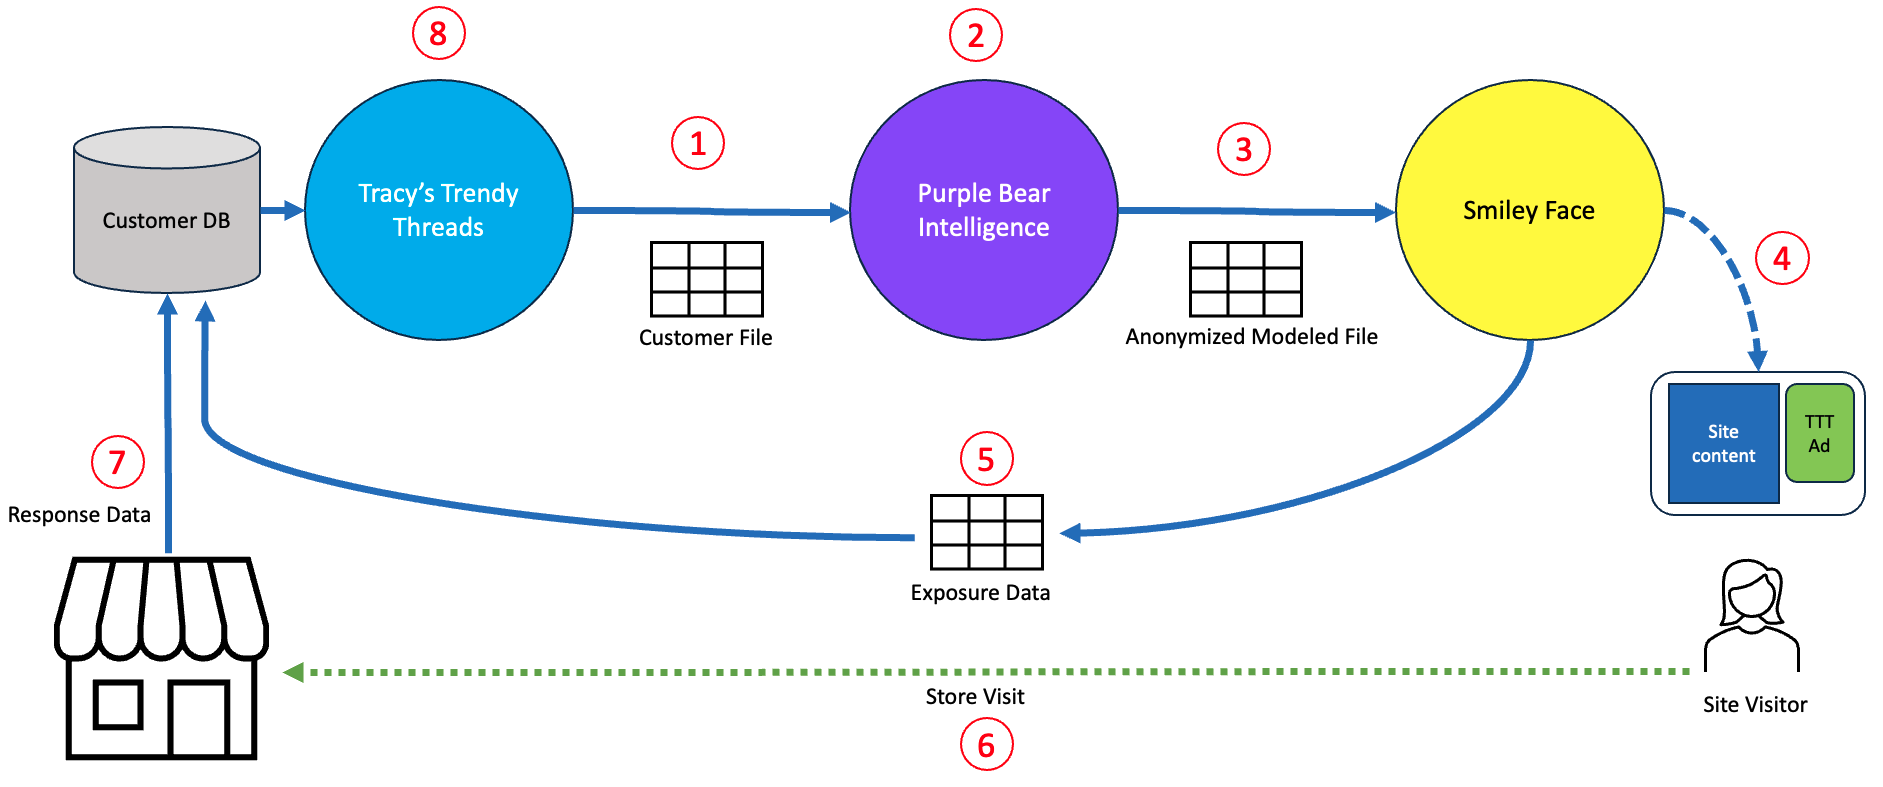

## Personally Identifiable Information (PII)

Since the definition of what constitutes PII continues to evolve and is somewhat subject to intepretation, in practice you will likely rely on guidance from your organization for legal requirements and best practices associated with handling PII.  

***For this assignment***, we will consider the following list to be the "official" list of PII items.

- Full name 
- Postal address 
- Government identifiers (e.g., Social Security Number (SSN), tax IDs, driver’s license, passport IDs)
- Financial identifiers (e.g., credit/debit card numbers, account numbers)
- Online communication identifiers (e.g., email address, social handles)
- Account logins (e.g., website login names)
- Unique identifiers derived from well-known fields
- Biometric identifiers (e.g., fingerprints, DNA, facial recognition)
- Internet protocol (IP) address
- Cookie IDs
- RFIDs


---
---
### <span style="color:red">Task 1 (15 points)</span>
**Load the TTT data.**

The data from **TTT** is in a file named "TTT_fake_customers.csv".  

Load the **TTT** data into a Pandas dataframe.  

Display some of the data to get an initial look at the row and column organization.

*As a side note, all of the data for this assignment was generated by a program.  The data does not contain any information about real people.*

In [4]:
customer_file = 'TTT_fake_customers.csv'
import pandas as pd
# Load the CSV 
ttt_df = pd.read_csv(customer_file)
# display data
ttt_df.head()       


,name,street_address,city,state,zipcode,ssn,income,purchases,sex,birthdate,email,username,ip,golf,travel,fashion,outdoors,technology,mdem
0,Jay Smith,98519 Brandon Turnpike,Benitezview,VA,39139,282-81-3031,11454.50,10265.78,M,2011-07-29,scott37@example.net,qbarber,166.218.233.113,0,0,1,1,0,ea2e25c82a542565ceb2b28399dff340
1,Breanna Archer,4419 Wells Dale,Mcdonaldport,AK,58829,690-02-9747,128999.55,12309.28,F,2020-10-02,tammyrichardson@example.net,nshepard,7.15.241.165,1,0,0,0,0,e1d61e0fba8313211650b9fbce57ca68
2,Mary Wilson,8529 Austin Gateway,Tracyside,UT,582,841-09-2746,54282.47,4663.30,F,1938-03-01,ghall@example.org,mleblanc,217.165.45.19,0,1,0,1,0,531495e3e23824db73891a14b41d4123
3,Leroy Fischer,541 Haynes Spurs,New Gregory,SD,77662,600-29-3686,46709.59,5691.94,M,2001-04-12,marialewis@example.org,rspencer,7.249.159.100,0,0,0,0,0,0bcf044f2c1dd5612de0dd5393e61cda
4,Bryan Brown,3019 Austin Camp Apt. 972,New Jeremy,CO,10028,631-17-7297,29754.60,970.66,M,2013-04-16,donnamahoney@example.org,dbentley,8.39.126.172,0,1,0,0,0,c6932966c40ec0cd63df82370cb3eccf


---
---
### <span style="color:red">Task 2 (15 points)</span> 
**Build and apply a model to their data that classifies their customers into one of several social/economic groups on the basis of household income.**

Using the `income` column, construct a new column called `economic class` the correct class based upon the table below.

This is the model that **PBI** has sold to **TTT** to help them classify their customers.

This is not a very...err...sophisticated model, but **TTT** doesn't need to know that!  

We will just use this simple model for our exercise.

| Base Income | Economic Class |
|-------------:|----------------:|
| 0 | Destitute |
| 9000 | Poor |
| 25000 | Working |
| 51000 | Middle |
| 115000 | Affluent |
| 500000 | Rich |


Display part of the customer dataframe with the new economic class column.

Display the number of customers in each economic class.

><span style="color:red">Hint:</span> Consider using the [Pandas `cut` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) to assign the appropriate Economic Class value to each row.

In [15]:
import numpy as np
import pandas as pd
#income ranges and labels
bins = [0, 9000, 25000, 51000, 115000, 500000, np.inf] #np.inf mean from 500000 to infinity
labels = ["Destitute", "Poor", "Working", "Middle", "Affluent", "Rich"]

# create new column using pd.cut
ttt_df["economic_class"] = pd.cut(
    ttt_df["income"],
    bins=bins,
    labels=labels,
    right=False,        # Means the intervals are left-closed right-open: [a, b)
    include_lowest=True
)

# Show part of the dataframe with the new column
ttt_df[["income", "economic_class"]].head()



,income,economic_class
0,11454.50,Poor
1,128999.55,Affluent
2,54282.47,Middle
3,46709.59,Working
4,29754.60,Working


In [16]:
ttt_df["economic_class"].value_counts()

economic_class
Middle       301
Affluent     298
Working      221
Poor         110
Destitute     62
Rich           8
Name: count, dtype: int64

---
---
### <span style="color:red">Task 3 (15 points)</span> 
**Randomly assign one of a set of marketing offers to the members of the data set.**

**TTT** has 5 different advertising offers that are referenced by a name.  **TTT** has already communicated the creative (i.e., the graphic or video shown with the ad) and the details of the offer deal (e.g., a discount or free shipping) to **SF**.  We at **PBI** don't know the details.  We are simply supposed to randomly assign the offers to each potential customer.

Construct a new column called `offer` and randomly assign one of the offers to each row.

Here is the table giving the offer names:

| Offer Name |
|------------|
| BlueElephant |
| YellowSeal |
| RedMouse |
| GreenLemur |
| PurpleBear |

Display the number of customers assigned each offer.

><span style="color:red">Hint:</span> Consider using the [numpy`random.choice` method](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) method to assign the offer name to each row.

In [19]:
offers = ["BlueElephant", "YellowSeal", "RedMouse", "GreenLemur", "PurpleBear"]
ttt_df["offer"] = np.random.choice(offers, size=len(ttt_df)) # Returns the number of rows
ttt_df[["income", "economic_class", "offer"]].head()

,income,economic_class,offer
0,11454.50,Poor,PurpleBear
1,128999.55,Affluent,PurpleBear
2,54282.47,Middle,RedMouse
3,46709.59,Working,YellowSeal
4,29754.60,Working,BlueElephant


In [20]:
ttt_df["offer"].value_counts()

offer
PurpleBear      215
GreenLemur      211
YellowSeal      204
RedMouse        192
BlueElephant    178
Name: count, dtype: int64

---
---
### <span style="color:red">Task 4 (15 points)</span>
***Generate an identifier that **SF** cannot use to identify the person associated with the data, but that **TTT** can reproduce so they can re-associate exposure and response data with specific customers.***

The client, **TTT**, told us to use a SHA256 hash via the `pbkdf2_hmac` method.  ***TTT*** specified the salt value (stored in the `salt` variable below) and the number iterations to use on the method (stored in `iterations` below).  You need to specify both of these values as parameters to `pdkdf2_hmac`.

> <span style="color:blue">Note: </span>The high number in the iterations parameter makes the hash secure, but the extra iterations will make the execution slow.  Don't be surprised if the computation of the hashes takes a couple of minutes.

You should save the hash using its hex encoding. We have to use the same hash technique, salt, and iterrations so that **TTT** can independently compute the same value.  

Using the `email` column, construct a new column called `exposure_id` that contains a salted SHA256 hash of the email returned by `pdkdf2_hmac` function.  Store the exposure id as the hex representation of the value.  Make sure to properly encode the email (see the hint below).

Display the encoded values from the `exposure_id` column from the first 5 rows of the dataframe

><span style="color:red">Hint:</span> You may want to use `apply` with a `lambda` function to call the hash routine for the entire dataframe.  By default, `apply` passes the value of a dataframe cell as the first parameter to the called function, but a `lambda` function will allow you to specify the parameter position of the cell value. 
>
>Note that the salt below is stored in `byte` format (i.e., the b"\<string\>") rather than a string.
>
>Strings (actually, `str`) are a type in Python, not just an array of bytes.  Bytes are a distinct type (`byte`) in Python.   Depending upon the encoding, characters in a string are not necessarily stored as a single byte, so storing in byte format assures an array of bytes.
>
>The `encode()` function converts a Python string type to a byte type.
>
>Make sure to `encode()` the email value from the dataframe before calling the hash routine.  The hash routines requires strings to be stored as bytes.

In [29]:
salt = b"Tracy's Trendy Threads secret salt"
iterations = 100000
import hashlib  # library that has pbkdf2_hmac

# These are already given in the notebook:
# salt = b"Tracy's Trendy Threads secret salt"
# iterations = 100000

# 1. Function that turns one email into one exposure_id
def make_exposure_id(email):
    # convert the email string to bytes (required by pbkdf2_hmac)
    email_bytes = email.encode()
    
    # run PBKDF2-HMAC with SHA256
    raw_hash = hashlib.pbkdf2_hmac(
        "sha256",      # hash function
        email_bytes,   # password (here: the email, in bytes)
        salt,          # salt (bytes, already given)
        iterations     # number of iterations (already given)
    )
    
    # convert bytes to hex string so we can store it nicely
    return raw_hash.hex()


ttt_df["exposure_id"] = ttt_df["email"].apply(make_exposure_id)# apply all the emails to the function
ttt_df[["email", "exposure_id"]].head()


,email,exposure_id
0,scott37@example.net,b7dcb3b238ac41174e085d5629dcbe71bbcd4c7d17522c...
1,tammyrichardson@example.net,a10a6e8ca664bf3e21317965ca4cfbd33adcc290be9a80...
2,ghall@example.org,b259abd0a4cd8d803ea2b5b877e7b7671916e1165714be...
3,marialewis@example.org,f904e6012ef80de83a5b3ea96946c67edda0e7d76e8805...
4,donnamahoney@example.org,899a27c04d234f0781335fb9c5e4727ce1222e4658c26a...


---
---
### <span style="color:red">Task 5 (15 points)</span>
**Anonymize the data.**

Identify the columns from the TTT data that contain PII data.  

Create a list called `pii_columns` that contains the column names of each of these columns. Leave the zip code column because **SF** uses that as part of their ad targeting algorithm. 

Remove all these columns from the dataframe and put the result into a new dataframe called `customers_anon`.

Display a sample set of rows from `customers_anon`.

After removing the PII columns, display the number of rows in the dataframe and the cardinality of each remaining column.  

Assess if any of the renaming high cardinality columns pose a privacy risk and write your assessment in a markdown cell.

In [30]:
#List of columns that contain PII
pii_columns = [
    "name",
    "street_address",
    "city",
    "state",
    "ssn",
    "birthdate",
    "email",
    "username",
    "ip"
]

# Create an anonymized dataframe with those columns removed
customers_anon = ttt_df.drop(columns=pii_columns)

#  Display a sample of the anonymized data
customers_anon.head()


,zipcode,income,purchases,sex,golf,travel,fashion,outdoors,technology,mdem,economic_class,offer,exposure_id
0,39139,11454.50,10265.78,M,0,0,1,1,0,ea2e25c82a542565ceb2b28399dff340,Poor,PurpleBear,b7dcb3b238ac41174e085d5629dcbe71bbcd4c7d17522c...
1,58829,128999.55,12309.28,F,1,0,0,0,0,e1d61e0fba8313211650b9fbce57ca68,Affluent,PurpleBear,a10a6e8ca664bf3e21317965ca4cfbd33adcc290be9a80...
2,582,54282.47,4663.30,F,0,1,0,1,0,531495e3e23824db73891a14b41d4123,Middle,RedMouse,b259abd0a4cd8d803ea2b5b877e7b7671916e1165714be...
3,77662,46709.59,5691.94,M,0,0,0,0,0,0bcf044f2c1dd5612de0dd5393e61cda,Working,YellowSeal,f904e6012ef80de83a5b3ea96946c67edda0e7d76e8805...
4,10028,29754.60,970.66,M,0,1,0,0,0,c6932966c40ec0cd63df82370cb3eccf,Working,BlueElephant,899a27c04d234f0781335fb9c5e4727ce1222e4658c26a...


In [31]:
#Number of rows after removing PII
print("Number of rows:", customers_anon.shape[0])

#Cardinality (number of distinct values) of each remaining column
customers_anon.nunique()


Number of rows: 1000


zipcode            996
income            1000
purchases         1000
sex                  2
golf                 2
travel               2
fashion              2
outdoors             2
technology           2
mdem               998
economic_class       6
offer                5
exposure_id        998
dtype: int64

Based on the project description, the above columns clearly contain PII and were dropped from the dataset
I kept zipcode on purpose because SF needs it for targeting, as the instructions say
However, some columns have very high cardinality (almost one unique value per person):
- zipcode
- income
- purchases
- mdem
- exposure_id
These columns could still be used to re-identify people if this file is matched with another dataset that has similar fields plus real names.

---
---
### <span style="color:red">Task 6 (15 points)</span>
**Produce a new file containing the anonymized data.**

The output file should be called "TTT_campaign_10.csv" and be in CSV format with column headers.  

Do not include the index from the dataframe in the output file.

In [32]:
# name of the output file
output_file = "TTT_campaign_10.csv"

# save the anonymized dataframe to CSV (with headers, without index)
customers_anon.to_csv(output_file, index=False)


---
---
### <span style="color:red">Task 7 (5 points)</span>
**Encrypt the anonymized file and transmit the anonymized data to **SF**. (We are not actually going to do this part).**

You don't actually have to encrypt the file or send it anywhere.

Instead, describe in a markdown cell below why we should encrypt the file for transmission even though the file is already anonymized.

Even though the file is anonymized, we should still encrypt it before sending it to SF.

Anonymizing the data removes obvious personal details, but it doesn’t make the file 100% safe. There are still columns like income, purchases, and zipcode that could be matched with other data sets to guess who some people are. If someone were to intercept the file while it’s being sent, they might be able to misuse that information. Encryption helps prevent this because anyone who doesn’t have the key can’t read the file.

Encrypting the file is also just good security practice. It adds an extra layer of protection in case something else goes wrong, like a hacked network or someone getting access to the file by mistake. On top of that, many privacy laws and company policies expect data to be protected both “in transit” (while it’s being sent) and “at rest” (when it’s stored). So, encrypting the anonymized file shows that TTT is taking data security seriously.
